##### **1. BUSINESS CONTEXT**

##### **1.1. Business Problem**

Certain key drivers have driven the used car market in Saudi Arabia over the last ten years, including an increase in population, higher disposable incomes, and a shift in people's preference for personal transportation. While the government works on diversifying its economy and gradually reduces its dependence on oil, the automotive sector has emerged as one of the key sectors for investment. Online platforms have revolutionized the way cars are bought and sold, with there being a great increase in digital transactions. All this has made the market more accessible; it creates an avenue for buyers to compare prices and features, thus making the market a lot more transparent and competitive on the part of the seller.

The regulatory environment is also undergoing changes that are supportive of the growth in the used car market. Improvement in consumer protection and vehicle quality has become more regular, with more stringent inspection and certification processes. These are important developments in relation to the building up of consumer trust as buyers are becoming more discreet with the cars they purchase. Another emerging trend in the market is that of sustainability, wherein used vehicles are considered by an increasing number of people as a way to lower their ecological footprint. In essence, it means that just as the used car market keeps taking a leap in growth, so too must the changes in dynamics among stakeholders-either through the form of dealerships or online websites-if they want to maximize an emerging opportunity.

##### **1.2. Objective**

This analysis is aim to develop a predictive model based on multiple factors that can accurately anticipate used automobile prices in Saudi Arabia. By offering reliable pricing predictions, this model will assist buyers and sellers in making well-informed decisions, thereby enhancing efficiency and transparency in the used automobile market.

##### **1.3. Analytical Approach**

predictive model for this analytical approach will be using regression method to predict used car price and model performance will be evaluate using the metric of RMSE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from scipy import stats

In [2]:
df = pd.read_csv('./data_saudi_used_cars.csv')

##### **2. DATA UNDERSTANDING**

The dataset is records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

In [3]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5624.0,2014.101885,5.791606,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5624.0,3.295430,1.515108,1.0,2.0,3.0,4.5,9.0
Mileage,5624.0,150923.375000,382835.963005,100.0,38000.0,103000.0,196000.0,20000000.0
Price,5624.0,53074.058144,70155.340614,0.0,0.0,36500.0,72932.5,850000.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Type,5624,347,Land Cruiser,269
Region,5624,27,Riyadh,2272
Make,5624,58,Toyota,1431
Gear_Type,5624,2,Automatic,4875
Origin,5624,4,Saudi,4188
Options,5624,3,Full,2233


summary : 
- Dataset consist of 10 columns with number of rows 5624 without missing value (non-null)
- There is an anomalies found where the car price is 0. we will perform further check for this.
- There is a possibilities of outliers on column year, price and mileage since the maximum value is far from the median and mean value. the handling of these outliers will adapt and assume based on the business context of used car in saudi arabia.

##### **2.1. Data Distribution**

In [7]:
numerical_cols = df.select_dtypes('number').columns

numerical_cols

Index(['Year', 'Engine_Size', 'Mileage', 'Price'], dtype='object')

In [8]:
categorical_cols = df.select_dtypes('object').columns

categorical_cols

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options'], dtype='object')

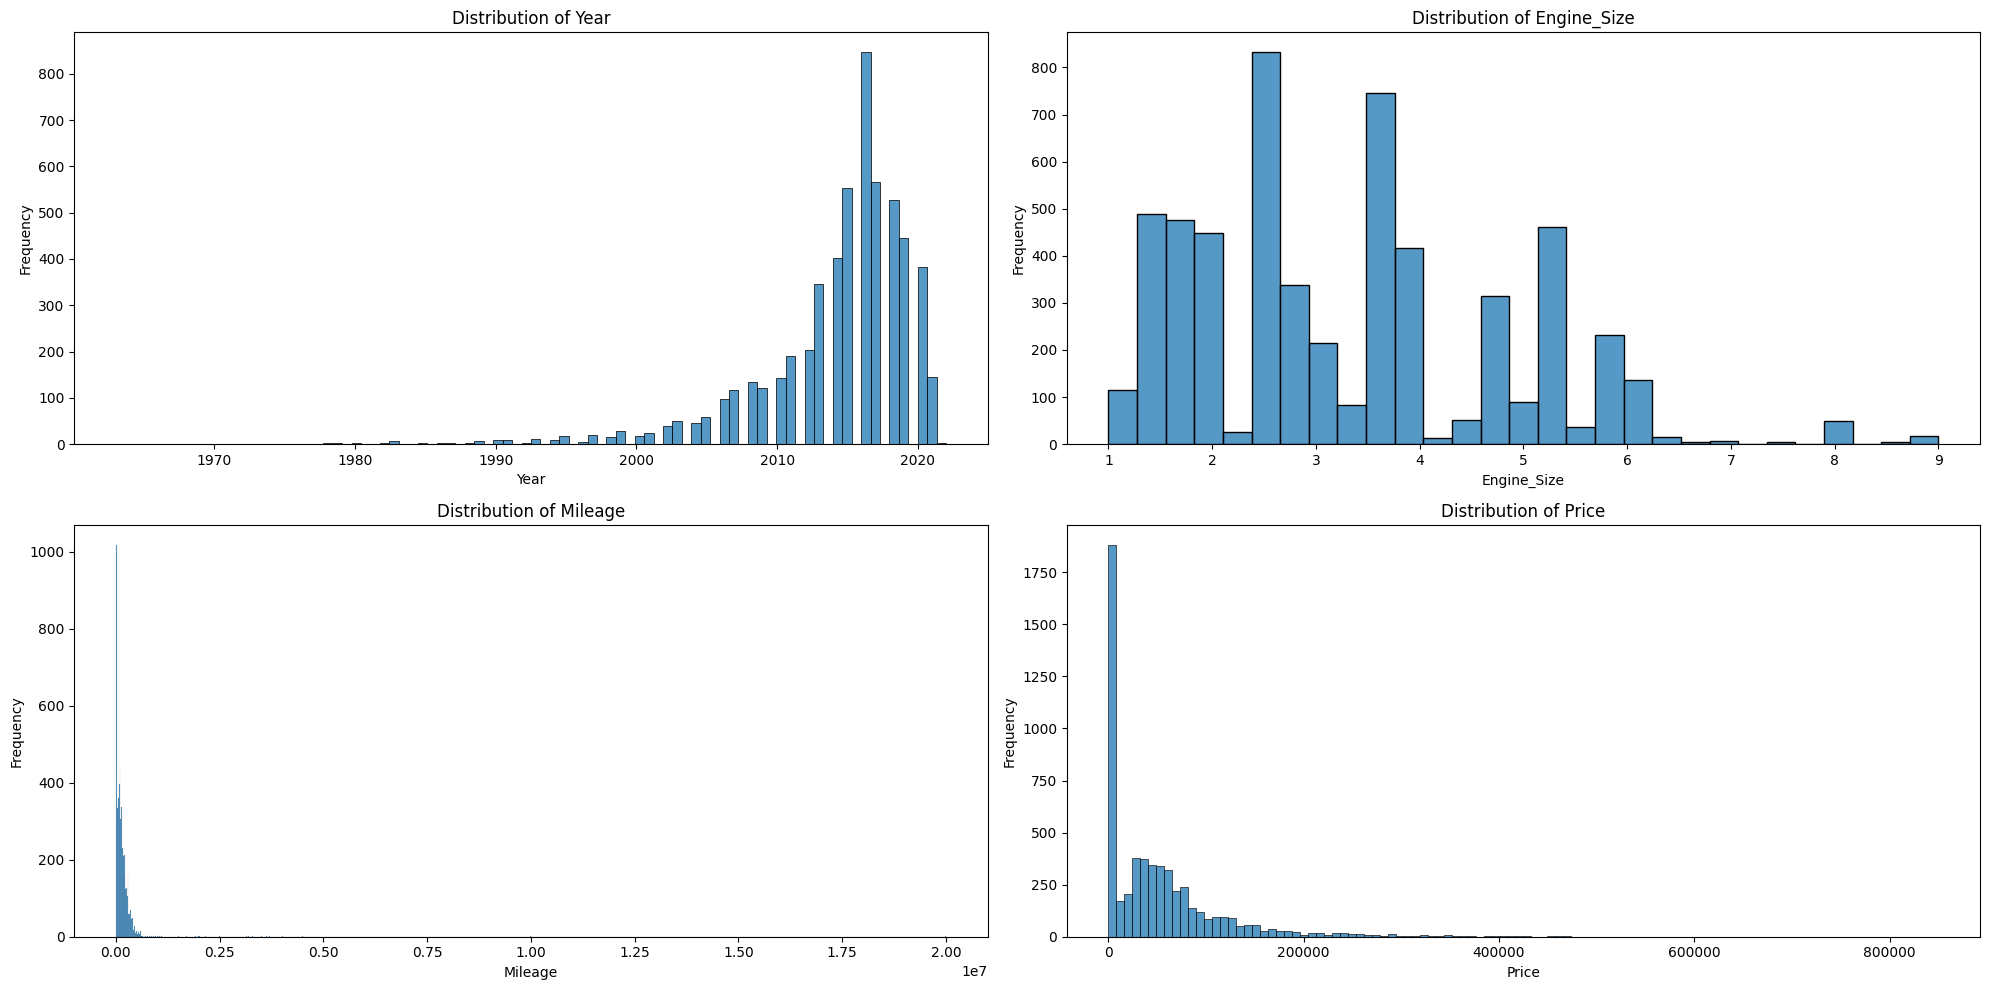

In [10]:
plt.figure(figsize=(20,10))

for index, col in enumerate(numerical_cols, 1) :
    plt.subplot(2, 2, index)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()